# Modules imported for analysis

In [1]:
#Modules are imported for the analysis

#Pandas library is used for working with the datasets, it has function of manipulating, cleaning, analyzing exploring the data
#Numpy library is used for the mathematical operations 
#Matplotlib library is used for data visualisation and graphical plotting in the data.
#Seaborn library is used for making stastical graphics.
#Scipy is used for technical and scientific computation. Stats is a submodule of scipy library which provides stastical functions.
#Datetime library provides working with the date and time. 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from datetime import datetime

# First dataset for the baseline 2015-2019 imported

In [2]:
#Dataset imported for the baseline analysis 2015-2019 and assigned it into a variable called 'df1'

df1 = pd.read_csv("C:/Users/Admin1/OneDrive/Desktop/Project MSc Data Science/weekly-deaths-by-local-authority-age-group-and-sex-2015-2019_Data.csv")

In [3]:
#Since the columns heading are named as "Unnamed" it is renamed by the (.rename function) to the relevant names for the columns.

df1 = df1.rename(columns = {
    df1.columns[0]: 'Year',
    'Unnamed: 1': 'Week',
    'Unnamed: 2': 'Council area code',
    'Unnamed: 3': 'Council Area',
    'Unnamed: 4': 'Sex',
    'Unnamed: 5': 'Age',
    'Unnamed: 6':'Number of Deaths'
})

In [4]:
#Dropped the 'nan' values from the dataset

df1.dropna(inplace = True)

In [5]:
#Dropped the first row since it was duplicating the column names

df1 = df1.drop(index=1)

In [6]:
#Restarted the index with 0

start = 0
df1.index = range(start, start +len(df1))

In [7]:
df1.head(5)

,Year,Week,Council area code,Council Area,Sex,Age,Number of Deaths
0,2015,1,S12000033,Aberdeen City,Female,45 to 49,1
1,2015,1,S12000033,Aberdeen City,Female,55 to 59,1
2,2015,1,S12000033,Aberdeen City,Female,60 to 64,2
3,2015,1,S12000033,Aberdeen City,Female,65 to 69,1
4,2015,1,S12000033,Aberdeen City,Female,70 to 74,5


In [8]:
#By using (.dtypes) checked the datatype of the df1

print(df1.dtypes)

Year                 object
Week                 object
Council area code    object
Council Area         object
Sex                  object
Age                  object
Number of Deaths     object
dtype: object


In [9]:
#Since the datatype is object for the 'week ', 'year' and 'number of deaths' it is changed from object to integer
#Year changed to integer datatype

df1['Year'] = df1['Year'].astype(int)

In [10]:
#Week changed to integer datatype

df1['Week'] = df1['Week'].astype(int)

In [11]:
#Number of deaths changed to integer datatype

df1['Number of Deaths'] = df1['Number of Deaths'].astype(int)

In [12]:
#Checked the datatype again for df1

print(df1.dtypes)

Year                  int32
Week                  int32
Council area code    object
Council Area         object
Sex                  object
Age                  object
Number of Deaths      int32
dtype: object


For the calculation of excess deaths week 53 and year 2023 was not included because not every week contains week 53 also year 2023 does not contains proper data for the analysis. If both the things were included it will cause inaccuracy in the calculation.

# Second dataset for which the excess death will be calculated imported 2020-2023

In [13]:
#Dataset imported for the excess death analysis 2020-2023 and assigned it into a variable called 'df2'

df2 = pd.read_csv("C:/Users/Admin1/OneDrive/Desktop/Project MSc Data Science/weekly-deaths-by-sex-age-group-health-board-2020-2023_Data.csv")

In [14]:
#Since the columns heading are named as "Unnamed" it is renamed by the (.rename function) to the relevant names for the columns.

df2 = df2.rename(columns = {
    'Data for weekly deaths1 by health board, age group, sex and cause, 2020-2023': 'Week',
    'Unnamed: 1': 'Health Board code',
    'Unnamed: 2': 'Health Board',
    'Unnamed: 3': 'Sex',
    'Unnamed: 4': 'Age',
    'Unnamed: 5': 'Cause',
    'Unnamed: 6':'Number of Deaths'
})

In [15]:
#Dropped the nan values from the df2

df2.dropna(inplace = True)

In [16]:
#Dropped the first row since it was duplicating the column names

df2 = df2.drop(index=1)

In [17]:
#Restarted the index with 0

start = 0
df2.index = range(start, start +len(df2))

In [18]:
df2.head(5)

,Week,Health Board code,Health Board,Sex,Age,Cause,Number of Deaths
0,20W01,S08000015,Ayrshire and Arran,F,35 to 39,Non-COVID-19,1
1,20W01,S08000015,Ayrshire and Arran,M,35 to 39,Non-COVID-19,1
2,20W01,S08000015,Ayrshire and Arran,F,45 to 49,Non-COVID-19,1
3,20W01,S08000015,Ayrshire and Arran,M,45 to 49,Non-COVID-19,1
4,20W01,S08000015,Ayrshire and Arran,M,50 to 54,Non-COVID-19,3


In [19]:
#Defined a function and used if-else statement to seperate the year from the week column since
#it contains both week-year together in an inter-string format and created a seperate column name year.
#The if-else statement says that if week starts with specify year eg(20,21,22 and 23)
#write it as (2020,2021,2022 and 2023) and saved it into a new column named 'year'

def get_year_from_week(Week):
    if Week.startswith('20'):
        return '2020'
    elif Week.startswith('21'):
        return '2021'
    elif Week.startswith('22'):
        return '2022'
    elif Week.startswith('23'):
        return '2023'
    else:
        return None

#Applied the function to the 'week ' column and created a new column named 'year'
df2['Year'] = df2['Week'].apply(get_year_from_week)


In [20]:
df2.head(5)

,Week,Health Board code,Health Board,Sex,Age,Cause,Number of Deaths,Year
0,20W01,S08000015,Ayrshire and Arran,F,35 to 39,Non-COVID-19,1,2020
1,20W01,S08000015,Ayrshire and Arran,M,35 to 39,Non-COVID-19,1,2020
2,20W01,S08000015,Ayrshire and Arran,F,45 to 49,Non-COVID-19,1,2020
3,20W01,S08000015,Ayrshire and Arran,M,45 to 49,Non-COVID-19,1,2020
4,20W01,S08000015,Ayrshire and Arran,M,50 to 54,Non-COVID-19,3,2020


In [21]:
#Defined a function to extract the week number from week string. Since the 'week' column contains values in string
#and integer format, week number was extracted from it. A function was defined to do so.The week string was first converted into
#a date object then the week number was extracted from the date object and appiled if-else statement to numbered the week and
#saved it into a column named 'week number'

def get_week_number(week_str):
    #Converted the week string to date object.The string is in the fromat of %yW%W-%w where %y is the last two digits of the year
    #W is seperator for the week number, %W represent the week number.Week starts from 0 which is sunday till 6 which is saturday so
    #The +'-1' is added to set the first day of the week.
    week_date = datetime.strptime(week_str + '-1', '%yW%W-%w')

    #Extracted week number from date object with the format of %W which returns a string and it is converted into an integer.
    week_number = int(week_date.strftime('%W'))

    #Created an if-else statement. If the week number is greater than 52 and month of the date object is 1 then start the
    #week with 0 which indicates that it in previous year and if the week number is 1 and month is 12 the week number is set to 53.
    if week_number >= 52 and week_date.month == 1:
        week_number = 0
    elif week_number == 1 and week_date.month == 12:
        week_number = 53

    # Return week number
    return week_number

#Applied the function to 'Week' column to extract the week numbers and saved it into a new column named 'Week Number'
df2['Week Number'] = df2['Week'].apply(get_week_number)


In [22]:
df2.head()

,Week,Health Board code,Health Board,Sex,Age,Cause,Number of Deaths,Year,Week Number
0,20W01,S08000015,Ayrshire and Arran,F,35 to 39,Non-COVID-19,1,2020,1
1,20W01,S08000015,Ayrshire and Arran,M,35 to 39,Non-COVID-19,1,2020,1
2,20W01,S08000015,Ayrshire and Arran,F,45 to 49,Non-COVID-19,1,2020,1
3,20W01,S08000015,Ayrshire and Arran,M,45 to 49,Non-COVID-19,1,2020,1
4,20W01,S08000015,Ayrshire and Arran,M,50 to 54,Non-COVID-19,3,2020,1


In [23]:
#For better understanding of the column names the 'Week' column is renamed as 'Week number' and 'Week Number' is renamed as 'Week'

df2 = df2.rename(columns = {
    'Week': 'Week Number',
    'Week Number':'Week'
})

In [24]:
df2.head()

,Week Number,Health Board code,Health Board,Sex,Age,Cause,Number of Deaths,Year,Week
0,20W01,S08000015,Ayrshire and Arran,F,35 to 39,Non-COVID-19,1,2020,1
1,20W01,S08000015,Ayrshire and Arran,M,35 to 39,Non-COVID-19,1,2020,1
2,20W01,S08000015,Ayrshire and Arran,F,45 to 49,Non-COVID-19,1,2020,1
3,20W01,S08000015,Ayrshire and Arran,M,45 to 49,Non-COVID-19,1,2020,1
4,20W01,S08000015,Ayrshire and Arran,M,50 to 54,Non-COVID-19,3,2020,1


In [25]:
#Created a new variable called newdf2015_2019 and copied the df1 in it. Created a copy of the original df1 for the analysis.

newdf2015_2019 = df1.copy()

In [26]:
#Checked the datatype for newdf2015_2019

print(newdf2015_2019.dtypes)

Year                  int32
Week                  int32
Council area code    object
Council Area         object
Sex                  object
Age                  object
Number of Deaths      int32
dtype: object


# Expected death baseline 2015-2019 calculation

In [27]:
#Expected death calculation on weekly basis for the year 2015-2019

#For the calculation week 53 was not included so it is filtered out

newdf2015_2019 = newdf2015_2019[newdf2015_2019['Week'] != 53]

#The data is grouped by the year, week and calculate the sum of the number of deaths for each week over all years 2015-2019

grouped = newdf2015_2019.groupby(['Year', 'Week'])['Number of Deaths'].sum().reset_index()

#Calculated the expected number of deaths for each week based on historical data and saved it into a variable called 'historical_means'

historical_means = grouped.groupby('Week')['Number of Deaths'].mean()
historical_means;

In [28]:
#Created a new variable called newdf2020_2022 and copied the df2 in it. Created a copy of the original df2 for the analysis.

newdf2020_2022 = df2.copy()

In [29]:
#Checked the datatype for newdf2020_2022

print(newdf2020_2022.dtypes)

Week Number          object
Health Board code    object
Health Board         object
Sex                  object
Age                  object
Cause                object
Number of Deaths     object
Year                 object
Week                  int64
dtype: object


In [30]:
#Converted the datatype of 'year' and 'number of deaths' since it is an object into 'integer'

newdf2020_2022['Year'] = newdf2020_2022['Year'].astype(int)
newdf2020_2022['Number of Deaths'] = newdf2020_2022['Number of Deaths'].astype(int)

In [31]:
newdf2020_2022

,Week Number,Health Board code,Health Board,Sex,Age,Cause,Number of Deaths,Year,Week
0,20W01,S08000015,Ayrshire and Arran,F,35 to 39,Non-COVID-19,1,2020,1
1,20W01,S08000015,Ayrshire and Arran,M,35 to 39,Non-COVID-19,1,2020,1
2,20W01,S08000015,Ayrshire and Arran,F,45 to 49,Non-COVID-19,1,2020,1
3,20W01,S08000015,Ayrshire and Arran,M,45 to 49,Non-COVID-19,1,2020,1
4,20W01,S08000015,Ayrshire and Arran,M,50 to 54,Non-COVID-19,3,2020,1
...,...,...,...,...,...,...,...,...,...
51913,23W06,S08000030,Tayside,M,95+,Non-COVID-19,2,2023,6
51914,23W06,S08000030,Tayside,F,95+,Non-COVID-19,8,2023,6
51915,23W06,S08000028,Western Isles,M,70 to 74,Non-COVID-19,1,2023,6
51916,23W06,S08000028,Western Isles,M,75 to 79,Non-COVID-19,1,2023,6


# Actual death Calculation 2020 

In [32]:
#Actual death calculation on weekly basis for year 2020

#For the calculation week 53 was not included so it is filtered out

newdf2020_2022 = newdf2020_2022[newdf2020_2022['Week'] != 53]

#The data is filtered by the year 2020 

actual_deaths_2020 = newdf2020_2022.loc[(newdf2020_2022['Year'] == 2020)]

#The data is grouped by week and sum the number of death by it

actual_deaths_2020 = actual_deaths_2020.groupby('Week')['Number of Deaths'].sum()
actual_deaths_2020;

# Exess death calculation for 2020

The formula for excess death is Excess death = Actual death - Expected death

In [33]:
excess_death_2020 = actual_deaths_2020 - historical_means
excess_death_2020;

# Visualisation of the actual death 2020

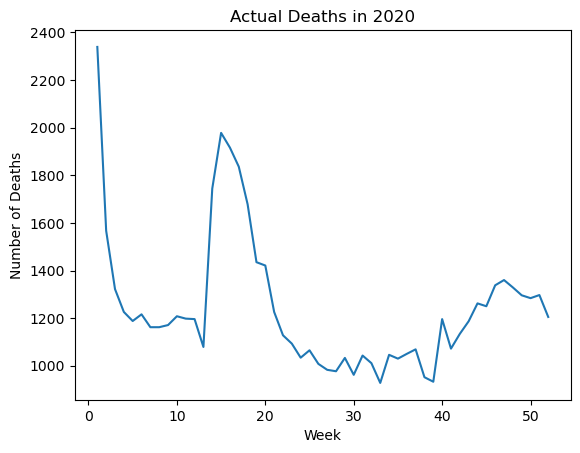

In [34]:
#Actual deaths were plotted against the number of death and weeks below

#Created a line plot for the actual death representation. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths.

plt.plot(actual_deaths_2020.index, actual_deaths_2020.values)
plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Actual Deaths in 2020')
plt.show()

# Visualisation of actual and excess death 2020

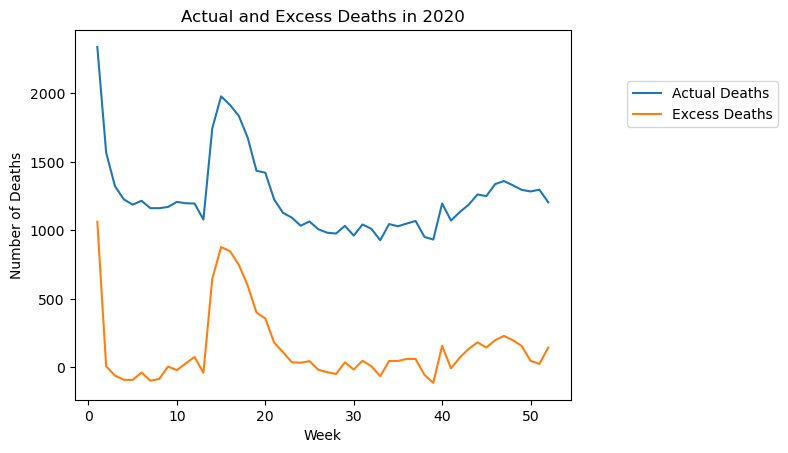

In [35]:
#Actual deaths and excess deaths were plotted against the number of death and weeks below

#Created a line plot for the actual death and excess death representation. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths and excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(actual_deaths_2020.index, actual_deaths_2020.values, label='Actual Deaths')
plt.plot(excess_death_2020.index, excess_death_2020.values , label='Excess Deaths')
plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Actual and Excess Deaths in 2020')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.8))
plt.show()

# Actual death calculation 2021 

In [36]:
#Actual death calculation on weekly basis for year 2021

#For the calculation week 53 was not included so it is filtered out

newdf2020_2022 = newdf2020_2022[newdf2020_2022['Week'] != 53]

#The data is filtered by the year 2021

actual_deaths_2021 = newdf2020_2022.loc[(newdf2020_2022['Year'] == 2021)]

#The data is grouped by week and sum the number of death by it

actual_deaths_2021 = actual_deaths_2021.groupby('Week')['Number of Deaths'].sum()
actual_deaths_2021;

# Excess death calculation for 2021 

In [37]:
excess_death_2021 = (actual_deaths_2021 - historical_means)
excess_death_2021;

# Visualisation of actual death 2021

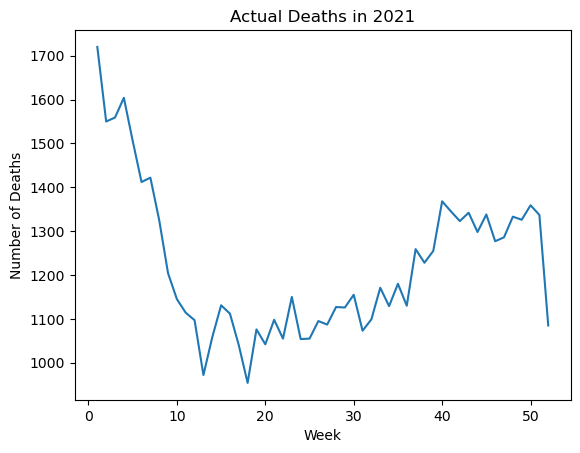

In [38]:
#Actual deaths were plotted against the number of death and weeks below

#Created a line plot for the actual death representation. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths.

plt.plot(actual_deaths_2021.index, actual_deaths_2021.values, label='Actual Deaths')

plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Actual Deaths in 2021')
plt.show()

# Visualisation of actual and excess death 2021

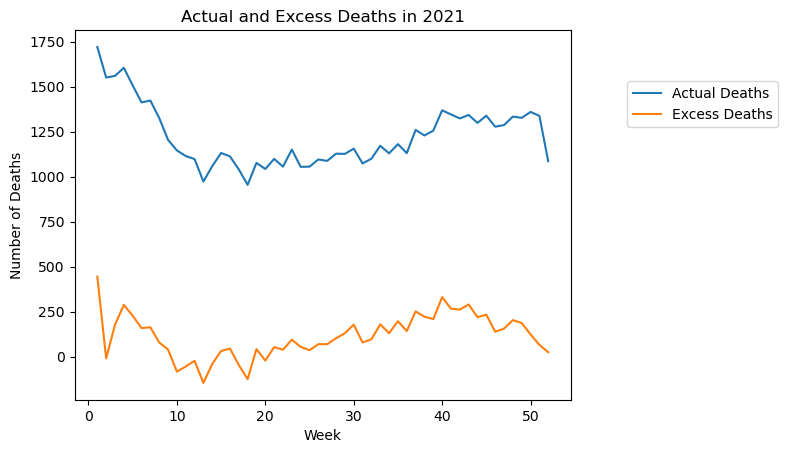

In [39]:
#Actual deaths and excess deaths were plotted against the number of death and weeks below

#Created a line plot for the actual death and excess death representation. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths and excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(actual_deaths_2021.index, actual_deaths_2021.values, label='Actual Deaths')
plt.plot(excess_death_2021.index, excess_death_2021.values, label='Excess Deaths')
plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Actual and Excess Deaths in 2021')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.8))
plt.show()

# Actual Death Calculation 2022

In [40]:
#Actual death calculation on weekly basis for year 2021

#For the calculation week 53 was not included so it is filtered out

newdf2020_2022 = newdf2020_2022[newdf2020_2022['Week'] != 53]

#The data is filtered by the year 2022

actual_deaths_2022 = newdf2020_2022.loc[(newdf2020_2022['Year'] == 2022)]

#The data is grouped by week and sum the number of death by it

actual_deaths_2022 = actual_deaths_2022.groupby('Week')['Number of Deaths'].sum()
actual_deaths_2022;

# Excess death calculation for 2022

In [41]:
excess_death_2022 = (actual_deaths_2022 - historical_means)
excess_death_2022;

# Visualisation of actual death 2022

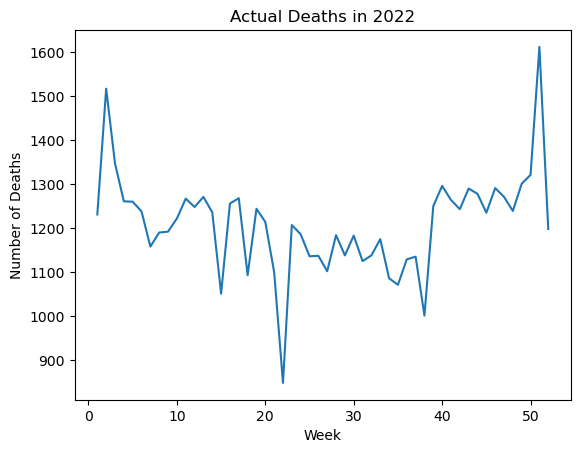

In [42]:
#Actual deaths and excess deaths were plotted against the number of death and weeks below

#Created a line plot for the actual death representation. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths.

plt.plot(actual_deaths_2022.index, actual_deaths_2022.values)
plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Actual Deaths in 2022')
plt.show()

# Visualisation of actual and excess death 2022

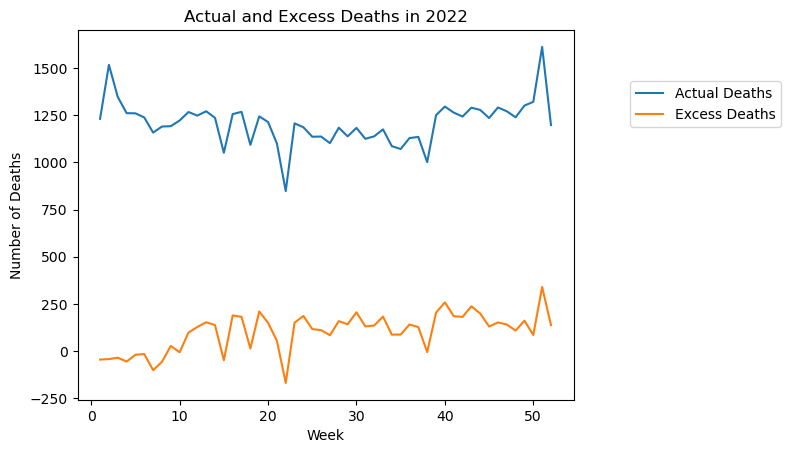

In [43]:
#Actual deaths and excess deaths were plotted against the number of death and weeks below

#Created a line plot for the actual death and excess death representation. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths and excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(actual_deaths_2022.index, actual_deaths_2022.values, label='Actual Deaths')
plt.plot(excess_death_2022.index, excess_death_2022.values, label='Excess Deaths')
plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Actual and Excess Deaths in 2022')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.8))
plt.show()

# Visualisation of actual deaths 2020, expected deaths 2015-2019 and excess deaths 2020

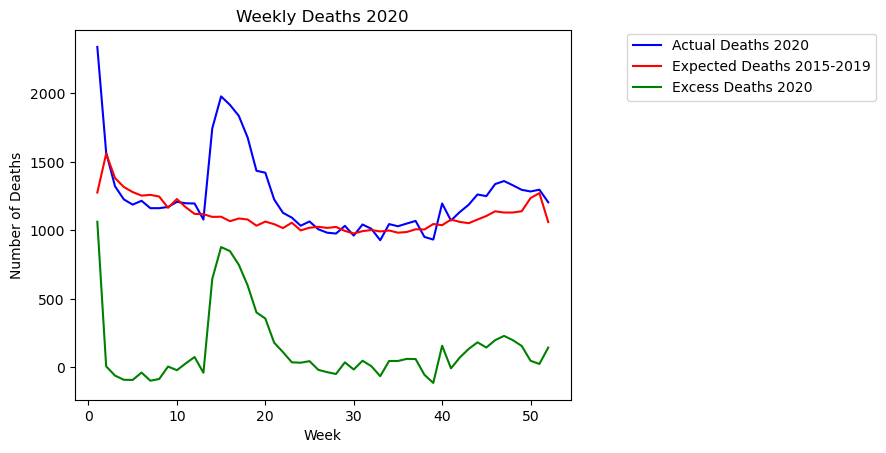

In [44]:
#Actual deaths, expected deaths (baseline 2015-2019) and excess deaths of 2020 is plotted against the number of deaths and weeks.
#Created a line plot for the actual, expected and excess deaths. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths, expected deaths and excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(actual_deaths_2020.index, actual_deaths_2020.values, color='blue', label='Actual Deaths 2020')
plt.plot(historical_means.index, historical_means.values, color='red', label='Expected Deaths 2015-2019')
plt.plot(excess_death_2020.index, excess_death_2020.values, color='green', label='Excess Deaths 2020')

plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Weekly Deaths 2020')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))


plt.show()

# Visualisation of actual deaths 2021, expected deaths 2015-2019 and excess deaths 2021

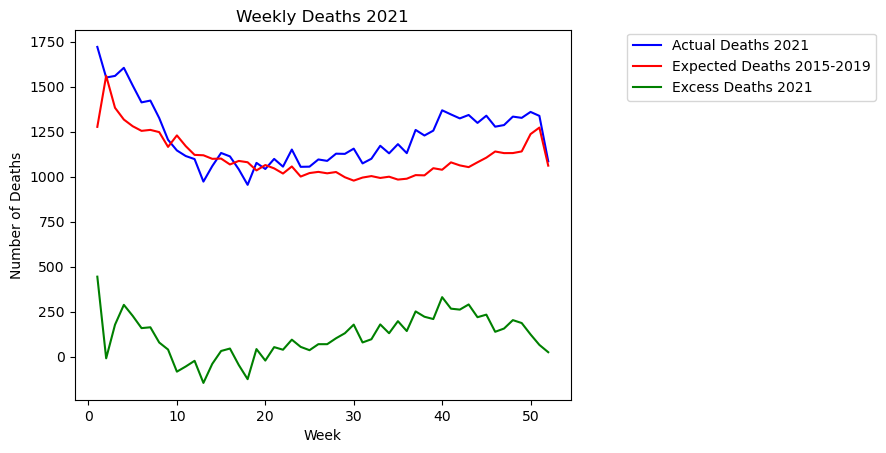

In [45]:
#Actual deaths, expected deaths (baseline 2015-2019) and excess deaths of 2021 is plotted against the number of deaths and weeks.
#Created a line plot for the actual, expected and excess deaths. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths, expected deaths and excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(actual_deaths_2021.index, actual_deaths_2021.values, color='blue', label='Actual Deaths 2021')
plt.plot(historical_means.index, historical_means.values, color='red', label='Expected Deaths 2015-2019')
plt.plot(excess_death_2021.index, excess_death_2021.values, color='green', label='Excess Deaths 2021')

plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Weekly Deaths 2021')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))

plt.show()

# Visualisation of actual death 2022, expected deaths 2015-2019 and excess deaths 2022

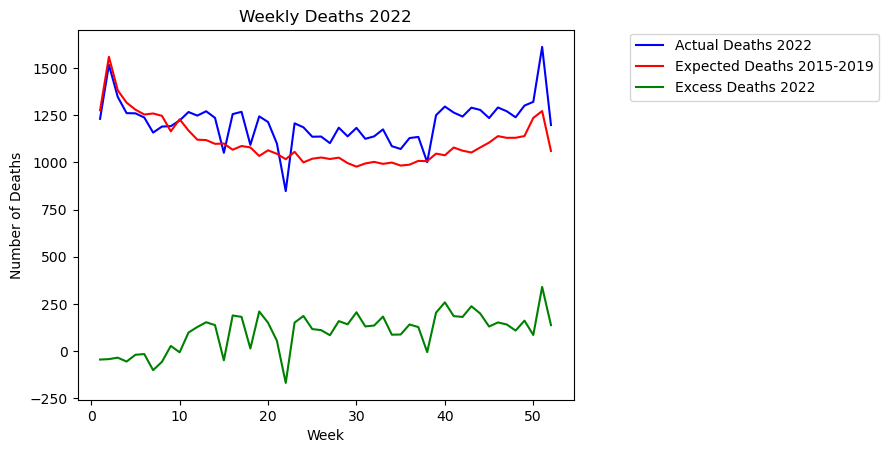

In [46]:
#Actual deaths, expected deaths (baseline 2015-2019) and excess deaths of 2022 is plotted against the number of deaths and weeks.
#Created a line plot for the actual, expected and excess deaths. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths, expected deaths and excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(actual_deaths_2022.index, actual_deaths_2022.values, color='blue', label='Actual Deaths 2022')
plt.plot(historical_means.index, historical_means.values, color='red', label='Expected Deaths 2015-2019')
plt.plot(excess_death_2022.index, excess_death_2022.values, color='green', label='Excess Deaths 2022')

plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Weekly Deaths 2022')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))

plt.show()

# Visualisation of all the three years 

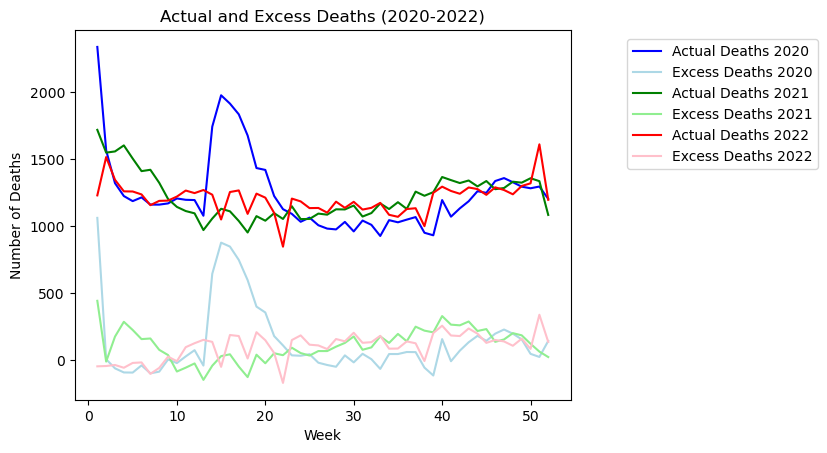

In [47]:
#Created a line plot for all the three years
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(actual_deaths_2020.index, actual_deaths_2020.values, color='blue', label='Actual Deaths 2020')
plt.plot(excess_death_2020.index, excess_death_2020.values, color='lightblue', label='Excess Deaths 2020')
plt.plot(actual_deaths_2021.index, actual_deaths_2021.values, color='green', label='Actual Deaths 2021')
plt.plot(excess_death_2021.index, excess_death_2021.values, color='lightgreen', label='Excess Deaths 2021')
plt.plot(actual_deaths_2022.index, actual_deaths_2022.values, color='red', label='Actual Deaths 2022')
plt.plot(excess_death_2022.index, excess_death_2022.values, color='pink', label='Excess Deaths 2022')

plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Actual and Excess Deaths (2020-2022)')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.8))

plt.show()

# Calculation of death by cause 2020

In [48]:
#There are three cause, non-Covid-19, Covid-19 underlying and Covid-19 contributory factor. For each casue number of death 
#calculation have been done week wise in the year 2020.

#The newdf2020_2022 was first filtered by year 2020 and then selected the particular cause, here non-Covid-19

non_covid_2020 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2020)&(newdf2020_2022['Cause']=='Non-COVID-19')]

#Then it is grouped by week and sum the number of deaths
non_covid_2020 = non_covid_2020.groupby('Week')['Number of Deaths'].sum()
non_covid_2020;

#The newdf2020_2022 was first filtered by year 2020 and then selected the particular cause, here Covid-19 underlying cause

underlying_2020 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2020)&(newdf2020_2022['Cause']=='COVID-19 underlying cause')]

#Then it is grouped by week and sum the number of deaths

underlying_2020 = underlying_2020.groupby('Week')['Number of Deaths'].sum()
underlying_2020;

#The newdf2020_2022 was first filtered by year 2020 and then selected the particular cause, here Covid-19 contributory factor

contributing_2020 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2020)&(newdf2020_2022['Cause']=='COVID-19 contributory factor')]

#Then it is grouped by week and sum the number of deaths

contributing_2020 = contributing_2020.groupby('Week')['Number of Deaths'].sum()
contributing_2020;

# Visualisation of death by cause 2020

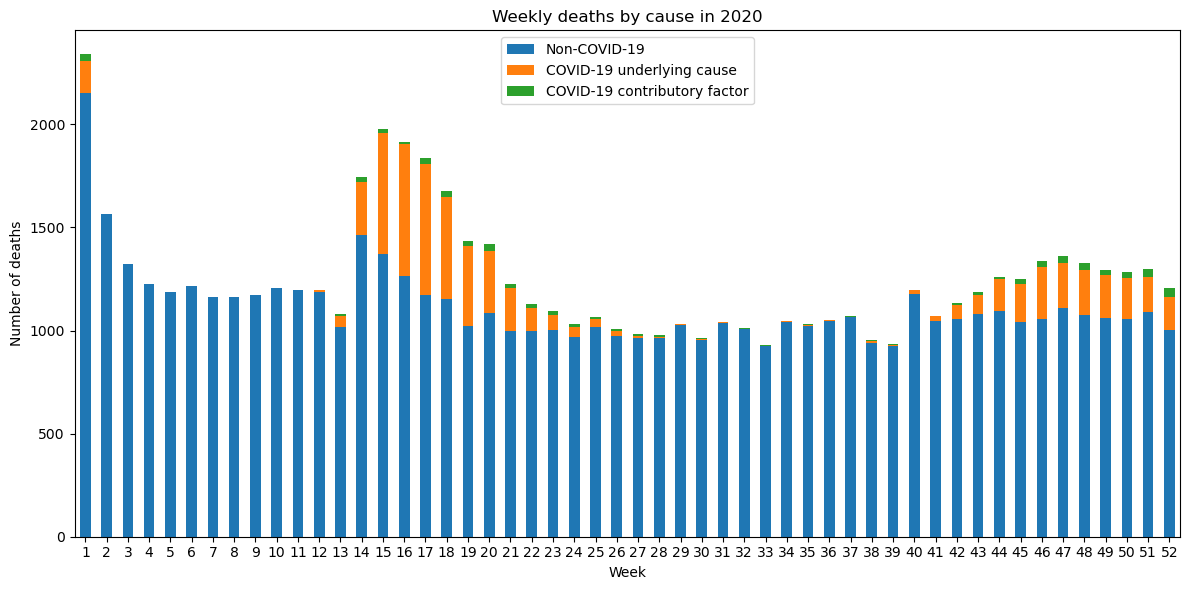

In [49]:
#All the three variables are now combined into a dataframe and named the respective columns

df2020 = pd.concat([non_covid_2020, underlying_2020, contributing_2020], axis=1)
df2020.columns = ['Non-COVID-19', 'COVID-19 underlying cause', 'COVID-19 contributory factor']

#Stack bar chart is plotted. The figure size is set by 12 by 6 inches, kind is set to bar to plot the bar chart and stacked is
#set to true to plot a stack bar chart in particular and it is stored in a variable called ax.

fig, ax = plt.subplots(figsize=(12,6))
df2020.plot(kind='bar', stacked=True, ax=ax)

#Lables were added

plt.xlabel('Week')
plt.ylabel('Number of deaths')
plt.title('Weekly deaths by cause in 2020')

#xticklabels is used for the markers denoting the data points on the axes. Rotation is the angle at which the ticklabels are visible.

ax.set_xticklabels(df2020.index, rotation=0)

#tight_layout is used for the adjustment of the space between the layout.

plt.tight_layout()

#Legend describe all the element of the graph. 

ax.legend(loc='upper center')

# Display the stack bar chart
plt.show()


# Calculation of death by cause 2021

In [50]:
#There are three cause, non-Covid-19, Covid-19 underlying and Covid-19 contributory factor. For each casue number of death 
#calculation have been done week wise in the year 2021.

#The newdf2020_2022 was first filtered by year 2021 and then selected the particular cause, here non-Covid-19

non_covid_2021 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2021)&(newdf2020_2022['Cause']=='Non-COVID-19')]

#Then it is grouped by week and sum the number of deaths

non_covid_2021 = non_covid_2021.groupby('Week')['Number of Deaths'].sum()
non_covid_2021;

#The newdf2020_2022 was first filtered by year 2021 and then selected the particular cause, here Covid-19 underlying cause

underlying_2021 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2021)&(newdf2020_2022['Cause']=='COVID-19 underlying cause')]

#Then it is grouped by week and sum the number of deaths

underlying_2021 = underlying_2021.groupby('Week')['Number of Deaths'].sum()
underlying_2021;

#The newdf2020_2022 was first filtered by year 2021 and then selected the particular cause, here Covid-19 contributory factor

contributing_2021 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2021)&(newdf2020_2022['Cause']=='COVID-19 contributory factor')]

#Then it is grouped by week and sum the number of deaths

contributing_2021 = contributing_2021.groupby('Week')['Number of Deaths'].sum()
contributing_2021;

# Visualisation of death by cause 2021

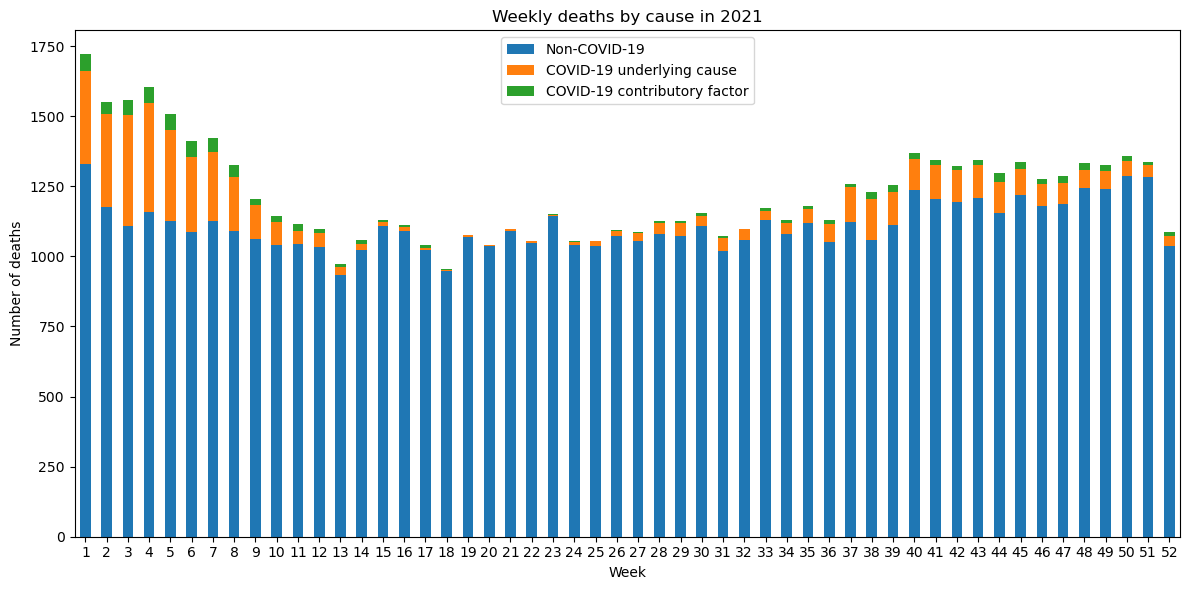

In [51]:
#All the three variables are now combined into a dataframe and named the respective columns

df2021 = pd.concat([non_covid_2021, underlying_2021, contributing_2021], axis=1)
df2021.columns = ['Non-COVID-19', 'COVID-19 underlying cause', 'COVID-19 contributory factor']

#Stack bar chart is plotted. The figure size is set by 12 by 6 inches, kind is set to bar to plot the bar chart and stacked is
#set to true to plot a stack bar chart in particular and it is stored in a variable called ax.

fig, ax = plt.subplots(figsize=(12,6))
df2021.plot(kind='bar', stacked=True, ax=ax)

#Lables were added

plt.xlabel('Week')
plt.ylabel('Number of deaths')
plt.title('Weekly deaths by cause in 2021')

#xticklabels is used for the markers denoting the data points on the axes. Rotation is the angle at which the ticklabels are visible.

ax.set_xticklabels(df2021.index, rotation=0)

#tight_layout is used for the adjustment of the space between the layout.

plt.tight_layout()

#Legend describe all the element of the graph. 
ax.legend(loc='upper center')


# Display the stack bar chart
plt.show()


# Calculation of death by cause 2022

In [52]:
#There are three cause, non-Covid-19, Covid-19 underlying and Covid-19 contributory factor. For each casue number of death 
#calculation have been done week wise in the year 2022.

#The newdf2020_2022 was first filtered by year 2022 and then selected the particular cause, here non-Covid-19

non_covid_2022 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2022)&(newdf2020_2022['Cause']=='Non-COVID-19')]

#Then it is grouped by week and sum the number of deaths

non_covid_2022 = non_covid_2022.groupby('Week')['Number of Deaths'].sum()
non_covid_2022;

#The newdf2020_2022 was first filtered by year 2022 and then selected the particular cause, here Covid-19 underlying cause

underlying_2022 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2022)&(newdf2020_2022['Cause']=='COVID-19 underlying cause')]

#Then it is grouped by week and sum the number of deaths

underlying_2022 = underlying_2022.groupby('Week')['Number of Deaths'].sum()
underlying_2022;

#The newdf2020_2022 was first filtered by year 2022 and then selected the particular cause, here Covid-19 contributory factor

contributing_2022 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2022)&(newdf2020_2022['Cause']=='COVID-19 contributory factor')]

#Then it is grouped by week and sum the number of deaths

contributing_2022 = contributing_2022.groupby('Week')['Number of Deaths'].sum()
contributing_2022;

# Visualisation of death by cause 2022

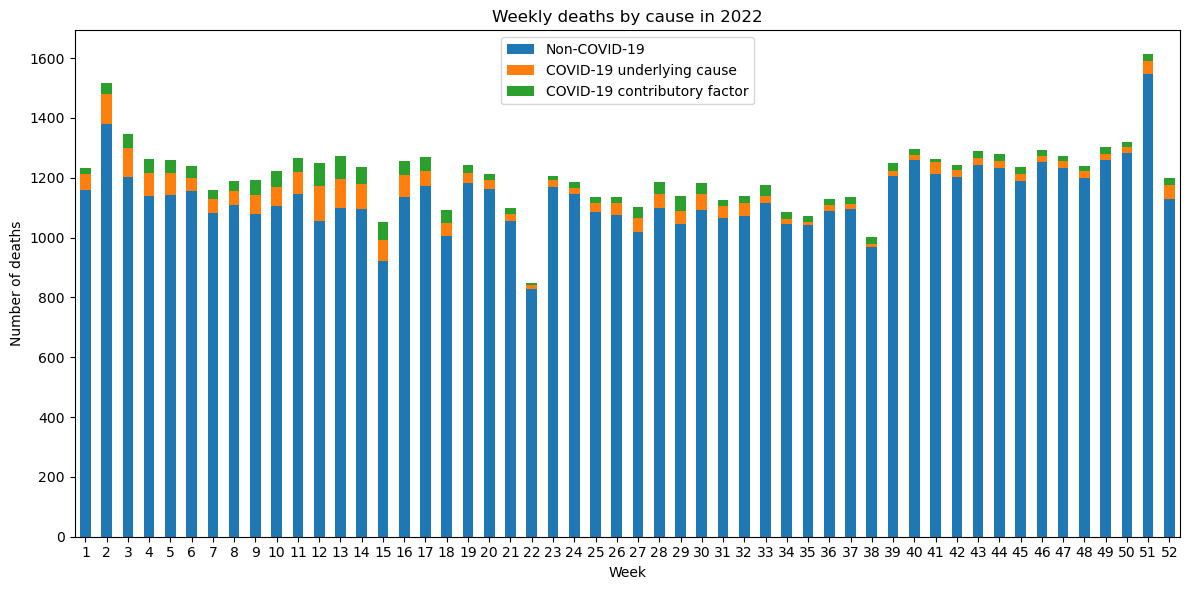

In [53]:
#All the three variables are now combined into a dataframe and named the respective columns

df2022 = pd.concat([non_covid_2022, underlying_2022, contributing_2022], axis=1)
df2022.columns = ['Non-COVID-19', 'COVID-19 underlying cause', 'COVID-19 contributory factor']

#Stack bar chart is plotted. The figure size is set by 12 by 6 inches, kind is set to bar to plot the bar chart and stacked is
#set to true to plot a stack bar chart in particular and it is stored in a variable called ax.

fig, ax = plt.subplots(figsize=(12,6))
df2022.plot(kind='bar', stacked=True, ax=ax)

#Lables were added

plt.xlabel('Week')
plt.ylabel('Number of deaths')
plt.title('Weekly deaths by cause in 2022')

#xticklabels is used for the markers denoting the data points on the axes. Rotation is the angle at which the ticklabels are visible.

ax.set_xticklabels(df2022.index, rotation=0)

#tight_layout is used for the adjustment of the space between the layout.

plt.tight_layout()

#Legend describe all the element of the graph. 

ax.legend(loc='upper center')

# Display the stack bar chart

plt.show()


# Calculation of expected death by gender (female) 2015-2019

In [54]:
#Calculation of expected death by gender (female) 2015-2019

#For the calculation week 53 was not included so it is filtered out

newdf2015_2019 = newdf2015_2019[newdf2015_2019['Week'] != 53]

#Filtered the gender by female and grouped the data by year and week and calculated the sum of deaths for each week over all years.

female_grouped = newdf2015_2019[newdf2015_2019['Sex'] == 'Female'].groupby(['Year', 'Week'])['Number of Deaths'].sum().reset_index()

#Calculated the expected number of deaths for each week based on historical data and saved it into a variable called 'historical_means_female'

historical_means_female = female_grouped.groupby('Week')['Number of Deaths'].mean()
historical_means_female;


# Calculation of actual deaths by gender (female) 2020

In [55]:
#Actual death calculation on weekly basis by gender (female) 2020

#For the calculation week 53 was not included so it is filtered out

newdf2020_2022 = newdf2020_2022[newdf2020_2022['Week'] != 53]

#Selected for the year 2020 and filter the gender by female

actual_deaths_female_2020 = newdf2020_2022.loc[(newdf2020_2022['Year'] == 2020) & (newdf2020_2022['Sex'] == 'F')]

#The data is grouped by week and sum the deaths by it

actual_deaths_female_2020 = actual_deaths_female_2020.groupby('Week')['Number of Deaths'].sum()
actual_deaths_female_2020;

# Excess death by gender (female) 2020

In [56]:
excess_death_female_2020 = actual_deaths_female_2020 - historical_means_female
excess_death_female_2020;

# Visualisation of actual death 2020, expected deaths 2015-2019 and excess deaths 2020 for female

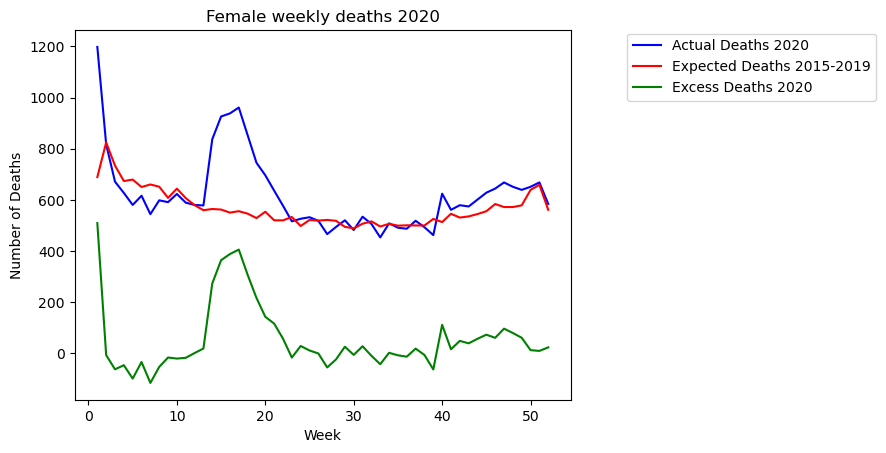

In [57]:
#Actual deaths, expected deaths (baseline 2015-2019) and excess deaths of 2020 for female is plotted against the number of deaths and weeks.
#Created a line plot for the actual, expected and excess deaths. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths, expected deaths and excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(actual_deaths_female_2020.index, actual_deaths_female_2020.values, color='blue', label='Actual Deaths 2020')
plt.plot(historical_means_female.index, historical_means_female.values, color='red', label='Expected Deaths 2015-2019')
plt.plot(excess_death_female_2020.index, excess_death_female_2020.values, color='green', label='Excess Deaths 2020')

plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Female weekly deaths 2020')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))

plt.show()

# Calculation of actual death by gender (female) 2021

In [58]:
#Actual death calculation on weekly basis by gender (female) 2021

#For the calculation week 53 was not included so it is filtered out

newdf2020_2022 = newdf2020_2022[newdf2020_2022['Week'] != 53]

#Selected for the year 2021 and filter the gender by female

actual_deaths_female_2021 = newdf2020_2022.loc[(newdf2020_2022['Year'] == 2021) & (newdf2020_2022['Sex'] == 'F')]

#The data is grouped by week and sum the deaths by it

actual_deaths_female_2021 = actual_deaths_female_2021.groupby('Week')['Number of Deaths'].sum()
actual_deaths_female_2021;

# Excess death by gender (female) 2021

In [59]:
excess_death_female_2021 = actual_deaths_female_2021 - historical_means_female
excess_death_female_2021;

# Visualisation of actual death 2021, expected deaths 2015-2019 and excess deaths 2021 for female

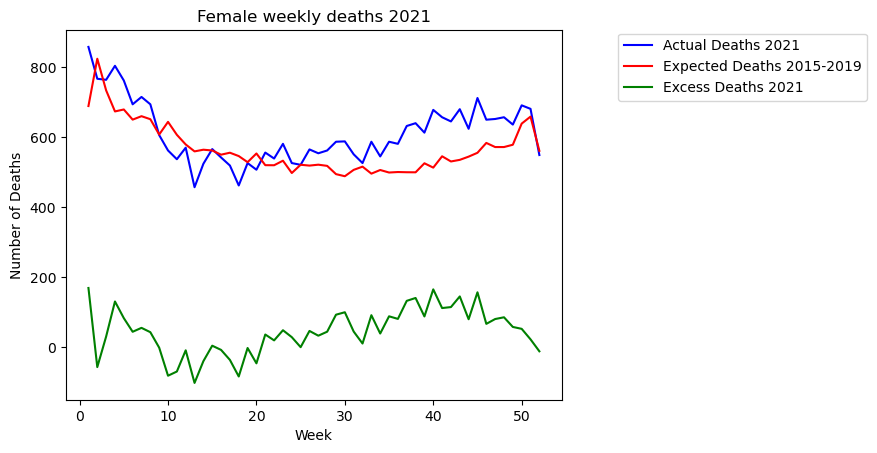

In [60]:
#Actual deaths, expected deaths (baseline 2015-2019) and excess deaths of 2021 for female is plotted against the number of deaths and weeks.
#Created a line plot for the actual, expected and excess deaths. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths, expected deaths and excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(actual_deaths_female_2021.index, actual_deaths_female_2021.values, color='blue', label='Actual Deaths 2021')
plt.plot(historical_means_female.index, historical_means_female.values, color='red', label='Expected Deaths 2015-2019')
plt.plot(excess_death_female_2021.index, excess_death_female_2021.values, color='green', label='Excess Deaths 2021')

plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Female weekly deaths 2021')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))

plt.show()

# Calculation of actual death by gender (female) 2022

In [61]:
#Actual death calculation on weekly basis by gender (female) 2022

#For the calculation week 53 was not included so it is filtered out

newdf2020_2022 = newdf2020_2022[newdf2020_2022['Week'] != 53]

#Selected for the year 2022 and filter the gender by female

actual_deaths_female_2022 = newdf2020_2022.loc[(newdf2020_2022['Year'] == 2021) & (newdf2020_2022['Sex'] == 'F')]

#The data is grouped by week and sum the deaths by it

actual_deaths_female_2022 = actual_deaths_female_2022.groupby('Week')['Number of Deaths'].sum()
actual_deaths_female_2022;

# Excess death by gender (female) 2022

In [62]:
excess_death_female_2022 = actual_deaths_female_2022 - historical_means_female
excess_death_female_2022;

# Visualisation of actual death 2022, expected deaths 2015-2019 and excess deaths 2022 for female

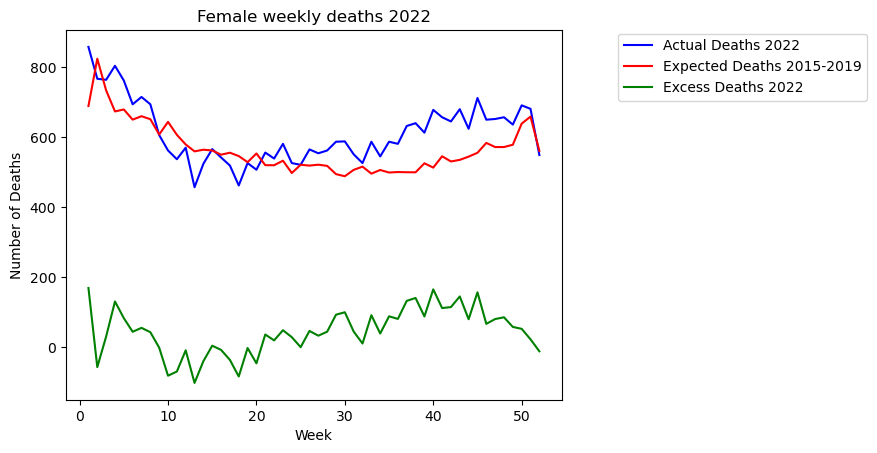

In [63]:
#Actual deaths, expected deaths (baseline 2015-2019) and excess deaths of 2022 for female is plotted against the number of deaths and weeks.
#Created a line plot for the actual, expected and excess deaths. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths, expected deaths and excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(actual_deaths_female_2022.index, actual_deaths_female_2022.values, color='blue', label='Actual Deaths 2022')
plt.plot(historical_means_female.index, historical_means_female.values, color='red', label='Expected Deaths 2015-2019')
plt.plot(excess_death_female_2022.index, excess_death_female_2022.values, color='green', label='Excess Deaths 2022')

plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Female weekly deaths 2022')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))

plt.show()

# Calculation of death by cause (female) 2020

In [64]:
#There are three cause, non-Covid-19, Covid-19 underlying and Covid-19 contributory factor. For each casue number of death 
#calculation have been done week wise in the year 2020.

#The newdf2020_2022 was first filtered by year 2020 and gender (female) and then selected the particular cause, here non-Covid-19

non_covid_female_2020 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2020)&(newdf2020_2022['Cause']=='Non-COVID-19')&(newdf2020_2022['Sex']=='F')]

#Then it is grouped by week and sum the number of deaths

non_covid_female_2020 = non_covid_female_2020.groupby('Week')['Number of Deaths'].sum()
non_covid_female_2020;

#The newdf2020_2022 was first filtered by year 2020 and then selected the particular cause, here Covid-19 underlying cause

underlying_female_2020 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2020)&(newdf2020_2022['Cause']=='COVID-19 underlying cause')&(newdf2020_2022['Sex']=='F')]

#Then it is grouped by week and sum the number of deaths

underlying_female_2020 = underlying_female_2020.groupby('Week')['Number of Deaths'].sum()
underlying_female_2020;

#The newdf2020_2022 was first filtered by year 2020 and then selected the particular cause, here Covid-19 contributory factor

contributing_female_2020 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2020)&(newdf2020_2022['Cause']=='COVID-19 contributory factor')&(newdf2020_2022['Sex']=='F')]

#Then it is grouped by week and sum the number of deaths

contributing_female_2020 = contributing_female_2020.groupby('Week')['Number of Deaths'].sum()
contributing_female_2020;

# Visualisation of death by cause (female) 2020

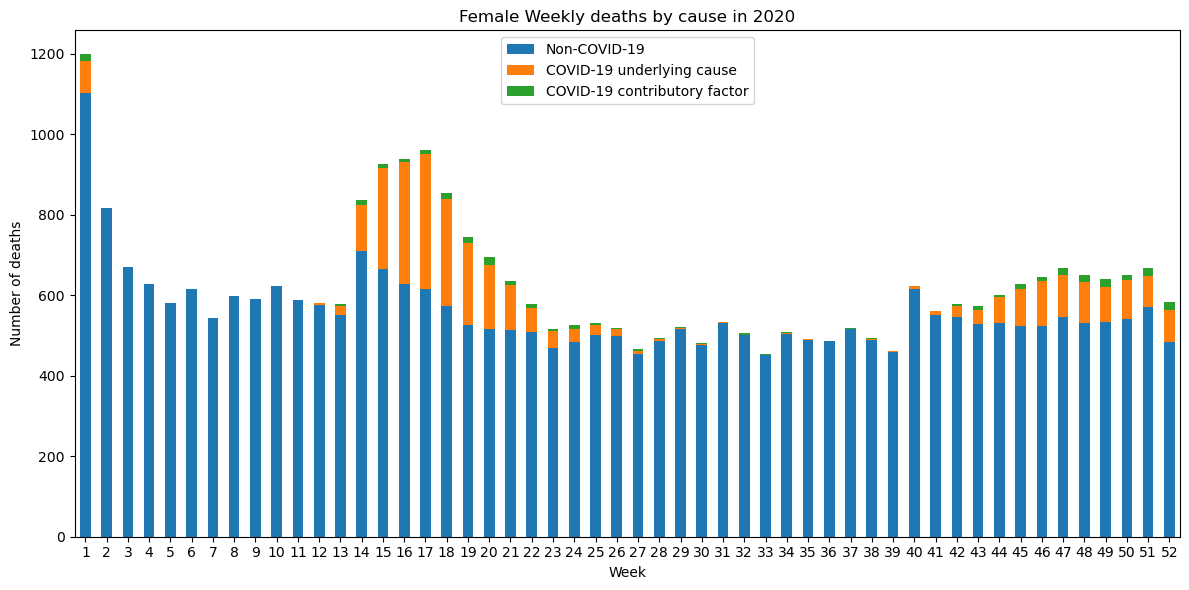

In [65]:
#All the three variables are now combined into a dataframe and named the respective columns

df_female2020 = pd.concat([non_covid_female_2020, underlying_female_2020, contributing_female_2020], axis=1)
df_female2020.columns = ['Non-COVID-19', 'COVID-19 underlying cause', 'COVID-19 contributory factor']

#Stack bar chart is plotted. The figure size is set by 12 by 6 inches, kind is set to bar to plot the bar chart and stacked is
#set to true to plot a stack bar chart in particular and it is stored in a variable called ax.

fig, ax = plt.subplots(figsize=(12,6))
df_female2020.plot(kind='bar', stacked=True, ax=ax)

#Lables were added

plt.xlabel('Week')
plt.ylabel('Number of deaths')
plt.title('Female Weekly deaths by cause in 2020')

#xticklabels is used for the markers denoting the data points on the axes. Rotation is the angle at which the ticklabels are visible.

ax.set_xticklabels(df_female2020.index, rotation=0)

#tight_layout is used for the adjustment of the space between the layout.

plt.tight_layout()

#Legend describe all the element of the graph. 

ax.legend(loc='upper center')

# Display the stack bar chart
plt.show()

# Calculation of death by cause (female) 2021

In [66]:
#There are three cause, non-Covid-19, Covid-19 underlying and Covid-19 contributory factor. For each casue number of death 
#calculation have been done week wise in the year 2021.

#The newdf2020_2022 was first filtered by year 2021 and gender (female) and then selected the particular cause, here non-Covid-19

non_covid_female_2021 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2021)&(newdf2020_2022['Cause']=='Non-COVID-19')&(newdf2020_2022['Sex']=='F')]

#Then it is grouped by week and sum the number of deaths

non_covid_female_2021 = non_covid_female_2021.groupby('Week')['Number of Deaths'].sum()
non_covid_female_2021;

#The newdf2020_2022 was first filtered by year 2021 and then selected the particular cause, here Covid-19 underlying cause

underlying_female_2021 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2021)&(newdf2020_2022['Cause']=='COVID-19 underlying cause')&(newdf2020_2022['Sex']=='F')]

#Then it is grouped by week and sum the number of deaths

underlying_female_2021 = underlying_female_2021.groupby('Week')['Number of Deaths'].sum()
underlying_female_2021;

#The newdf2020_2022 was first filtered by year 2021 and then selected the particular cause, here Covid-19 contributory factor

contributing_female_2021 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2021)&(newdf2020_2022['Cause']=='COVID-19 contributory factor')&(newdf2020_2022['Sex']=='F')]

#Then it is grouped by week and sum the number of deaths

contributing_female_2021 = contributing_female_2021.groupby('Week')['Number of Deaths'].sum()
contributing_female_2021;

# Visualisation of death by cause (female) 2021

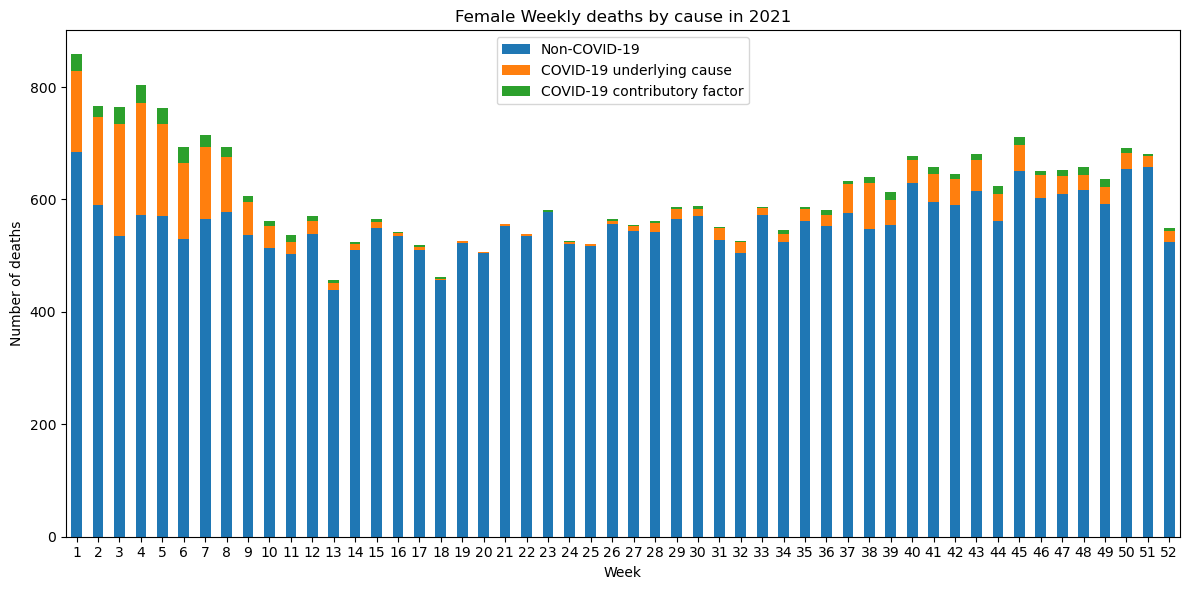

In [67]:
#All the three variables are now combined into a dataframe and named the respective columns

df_female2021 = pd.concat([non_covid_female_2021, underlying_female_2021, contributing_female_2021], axis=1)
df_female2021.columns = ['Non-COVID-19', 'COVID-19 underlying cause', 'COVID-19 contributory factor']

#Stack bar chart is plotted. The figure size is set by 12 by 6 inches, kind is set to bar to plot the bar chart and stacked is
#set to true to plot a stack bar chart in particular and it is stored in a variable called ax

fig, ax = plt.subplots(figsize=(12,6))
df_female2021.plot(kind='bar', stacked=True, ax=ax)

#Lables were added

plt.xlabel('Week')
plt.ylabel('Number of deaths')
plt.title('Female Weekly deaths by cause in 2021')

#xticklabels is used for the markers denoting the data points on the axes. Rotation is the angle at which the ticklabels are visible.

ax.set_xticklabels(df_female2021.index, rotation=0)

#tight_layout is used for the adjustment of the space between the layout.

plt.tight_layout()

#Legend describe all the element of the graph. 

ax.legend(loc='upper center')

# Display the stack bar chart
plt.show()

# Calculation of death by cause (female) 2022

In [68]:
#There are three cause, non-Covid-19, Covid-19 underlying and Covid-19 contributory factor. For each casue number of death 
#calculation have been done week wise in the year 2022.

#The newdf2020_2022 was first filtered by year 2022 and gender (female) and then selected the particular cause, here non-Covid-19

non_covid_female_2022 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2022)&(newdf2020_2022['Cause']=='Non-COVID-19')&(newdf2020_2022['Sex']=='F')]

#Then it is grouped by week and sum the number of deaths

non_covid_female_2022 = non_covid_female_2022.groupby('Week')['Number of Deaths'].sum()
non_covid_female_2022;

#The newdf2020_2022 was first filtered by year 2022 and then selected the particular cause, here Covid-19 underlying cause

underlying_female_2022 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2022)&(newdf2020_2022['Cause']=='COVID-19 underlying cause')&(newdf2020_2022['Sex']=='F')]

#Then it is grouped by week and sum the number of deaths

underlying_female_2022 = underlying_female_2022.groupby('Week')['Number of Deaths'].sum()
underlying_female_2022;

#The newdf2020_2022 was first filtered by year 2022 and then selected the particular cause, here Covid-19 contributory factor

contributing_female_2022 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2022)&(newdf2020_2022['Cause']=='COVID-19 contributory factor')&(newdf2020_2022['Sex']=='F')]

#Then it is grouped by week and sum the number of deaths

contributing_female_2022 = contributing_female_2022.groupby('Week')['Number of Deaths'].sum()
contributing_female_2022;

# Visualisation of death by cause (female) 2022

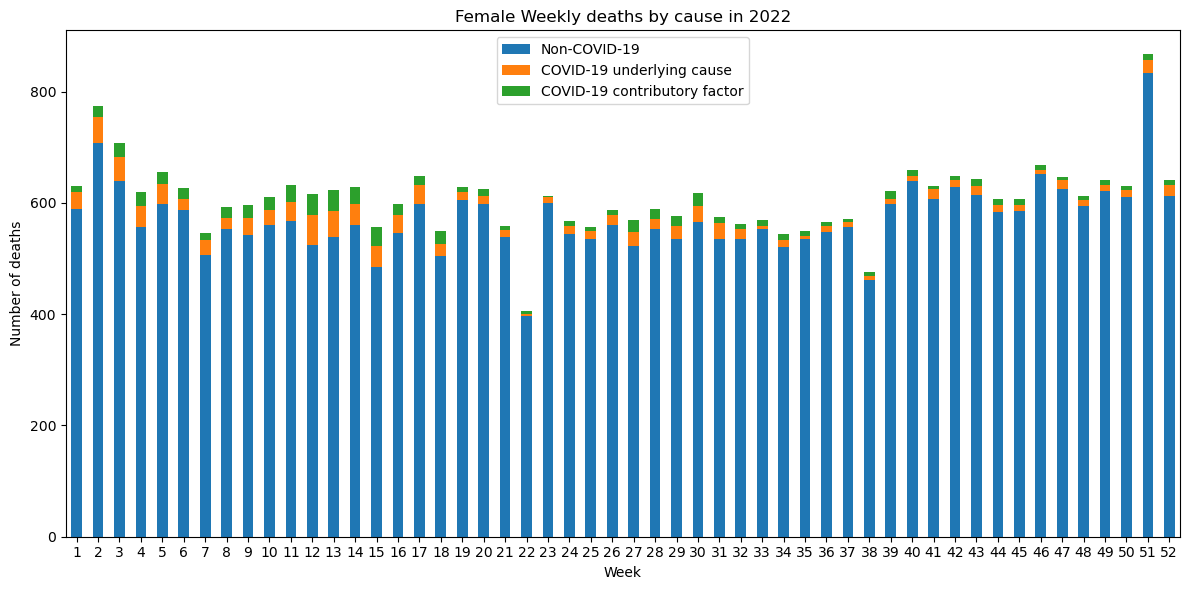

In [69]:
#All the three variables are now combined into a dataframe and named the respective columns

df_female2022 = pd.concat([non_covid_female_2022, underlying_female_2022, contributing_female_2022], axis=1)
df_female2022.columns = ['Non-COVID-19', 'COVID-19 underlying cause', 'COVID-19 contributory factor']

#Stack bar chart is plotted. The figure size is set by 12 by 6 inches, kind is set to bar to plot the bar chart and stacked is
#set to true to plot a stack bar chart in particular and it is stored in a variable called ax.

fig, ax = plt.subplots(figsize=(12,6))
df_female2022.plot(kind='bar', stacked=True, ax=ax)

#Lables were added

plt.xlabel('Week')
plt.ylabel('Number of deaths')
plt.title('Female Weekly deaths by cause in 2022')

#xticklabels is used for the markers denoting the data points on the axes. Rotation is the angle at which the ticklabels are visible.

ax.set_xticklabels(df_female2022.index, rotation=0)

#tight_layout is used for the adjustment of the space between the layout.

plt.tight_layout()

#Legend describe all the element of the graph. 

ax.legend(loc='upper center')

# Display the stack bar chart
plt.show()

# Expected Death Calculation Weekly by male 2015-2019 Baseline

In [70]:
#Calculation of expected death by gender (male) 2015-2019

#For the calculation week 53 was not included so it is filtered out

newdf2015_2019 = newdf2015_2019[newdf2015_2019['Week'] != 53]

#Filtered the gender by male and grouped the data by year and week and calculated the sum of deaths for each week over all years.

male_grouped = newdf2015_2019[newdf2015_2019['Sex'] == 'Male'].groupby(['Year', 'Week'])['Number of Deaths'].sum().reset_index()

#Calculated the expected number of deaths for each week based on historical data and saved it into a variable called 'historical_means_male'

historical_means_male = male_grouped.groupby('Week')['Number of Deaths'].mean()
historical_means_male;

# Calculation of actual death by gender (male) 2020

In [71]:
#Actual death calculation on weekly basis by gender (male) 2020

#For the calculation week 53 was not included so it is filtered out

newdf2020_2022 = newdf2020_2022[newdf2020_2022['Week'] != 53]

#Selected for the year 2020 and filter the gender by female

actual_deaths_male_2020 = newdf2020_2022.loc[(newdf2020_2022['Year'] == 2020) & (newdf2020_2022['Sex'] == 'M')]

#The data is grouped by week and sum the deaths by it

actual_deaths_male_2020 = actual_deaths_male_2020.groupby('Week')['Number of Deaths'].sum()
actual_deaths_male_2020;

# Excess death by gender (male) 2020

In [72]:
excess_death_male_2020 = actual_deaths_male_2020 - historical_means_male
excess_death_male_2020;

# Visualisation of actual death 2020, expected deaths 2015-2019 and excess deaths 2020 for male

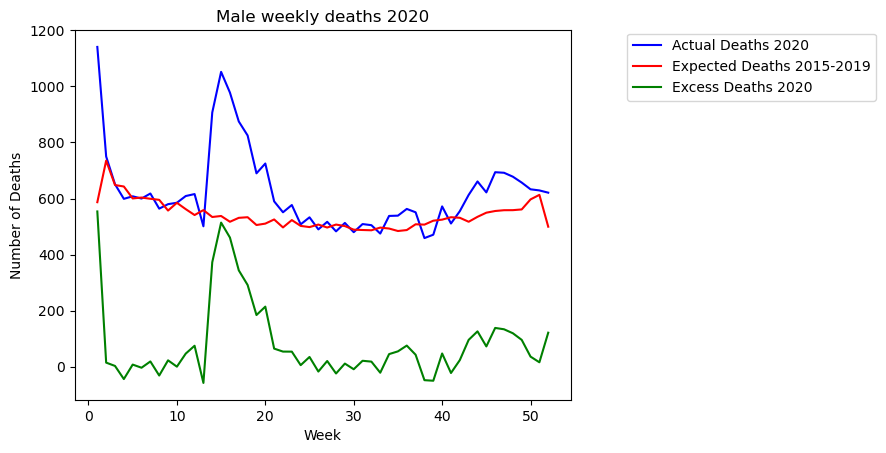

In [73]:
#Actual deaths, expected deaths (baseline 2015-2019) and excess deaths of 2020 for male is plotted against the number of deaths and weeks.
#Created a line plot for the actual, expected and excess deaths. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths, expected deaths and excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(actual_deaths_male_2020.index, actual_deaths_male_2020.values, color='blue', label='Actual Deaths 2020')
plt.plot(historical_means_male.index, historical_means_male.values, color='red', label='Expected Deaths 2015-2019')
plt.plot(excess_death_male_2020.index, excess_death_male_2020.values, color='green', label='Excess Deaths 2020')

plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Male weekly deaths 2020')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))

plt.show()

# Calculation of actual death by gender (male) 2021

In [74]:
#Actual death calculation on weekly basis by gender (male) 2021

#For the calculation week 53 was not included so it is filtered out

newdf2020_2022 = newdf2020_2022[newdf2020_2022['Week'] != 53]

#Selected for the year 2021 and filter the gender by male

actual_deaths_male_2021 = newdf2020_2022.loc[(newdf2020_2022['Year'] == 2021) & (newdf2020_2022['Sex'] == 'M')]

#The data is grouped by week and sum the deaths by it

actual_deaths_male_2021 = actual_deaths_male_2021.groupby('Week')['Number of Deaths'].sum()
actual_deaths_male_2021;

# Excess death by gender (male) 2021

In [75]:
excess_death_male_2021 = actual_deaths_male_2021 - historical_means_male
excess_death_male_2021;

# Visualisation of actual death 2021, expected deaths 2015-2019 and excess deaths 2021 for male

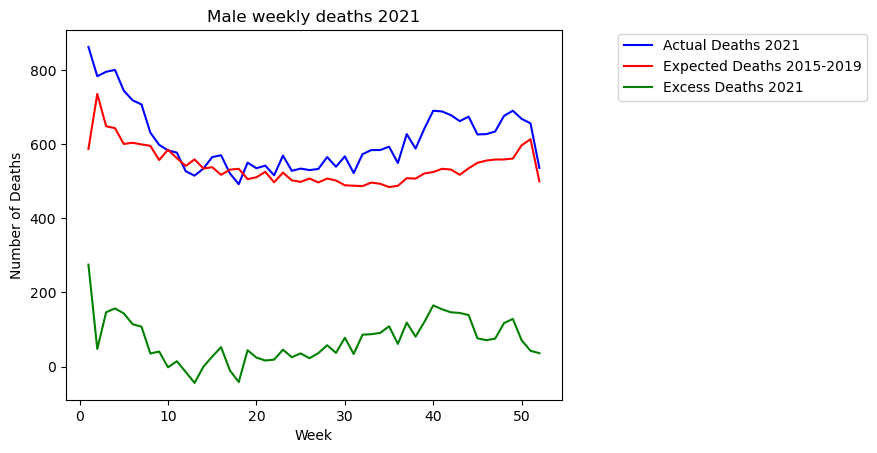

In [76]:
#Actual deaths, expected deaths (baseline 2015-2019) and excess deaths of 2021 for male is plotted against the number of deaths and weeks.
#Created a line plot for the actual, expected and excess deaths. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths, expected deaths and excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(actual_deaths_male_2021.index, actual_deaths_male_2021.values, color='blue', label='Actual Deaths 2021')
plt.plot(historical_means_male.index, historical_means_male.values, color='red', label='Expected Deaths 2015-2019')
plt.plot(excess_death_male_2021.index, excess_death_male_2021.values, color='green', label='Excess Deaths 2021')

plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Male weekly deaths 2021')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))

plt.show()

# Calculation of actual death by gender (male) 2022

In [77]:
#Actual death calculation on weekly basis by gender (male) 2022

#For the calculation week 53 was not included so it is filtered out

newdf2020_2022 = newdf2020_2022[newdf2020_2022['Week'] != 53]

#Selected for the year 2022 and filter the gender by male

actual_deaths_male_2022 = newdf2020_2022.loc[(newdf2020_2022['Year'] == 2022) & (newdf2020_2022['Sex'] == 'M')]

#The data is grouped by week and sum the deaths by it

actual_deaths_male_2022 = actual_deaths_male_2022.groupby('Week')['Number of Deaths'].sum()
actual_deaths_male_2022;

# Excess death by gender (male) 2022

In [78]:
excess_death_male_2022 = actual_deaths_male_2022 - historical_means_male
excess_death_male_2022;

# Visualisation of actual death 2022, expected deaths 2015-2019 and excess deaths 2022 for male

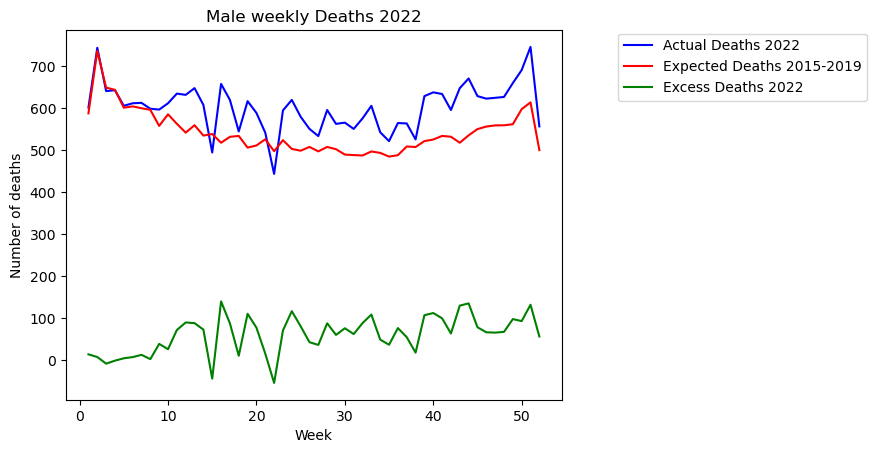

In [79]:
#Actual deaths, expected deaths (baseline 2015-2019) and excess deaths of 2022 for male is plotted against the number of deaths and weeks.
#Created a line plot for the actual, expected and excess deaths. The (.index) returns the position at the first 
#occurrence of the specified value here for actual deaths, expected deaths and excess deaths.
#The (bbox_to_anchor) is used to put the legend outside the graph for clear visualisation.

plt.plot(actual_deaths_male_2022.index, actual_deaths_male_2022.values, color='blue', label='Actual Deaths 2022')
plt.plot(historical_means_male.index, historical_means_male.values, color='red', label='Expected Deaths 2015-2019')
plt.plot(excess_death_male_2022.index, excess_death_male_2022.values, color='green', label='Excess Deaths 2022')

plt.xlabel('Week')
plt.ylabel('Number of deaths')
plt.title('Male weekly Deaths 2022')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.9))

plt.show()

# Calculation of death by cause (male) 2020

In [80]:
#There are three cause, non-Covid-19, Covid-19 underlying and Covid-19 contributory factor. For each casue number of death 
#calculation have been done week wise in the year 2020.

#The newdf2020_2022 was first filtered by year 2020 and gender (male) and then selected the particular cause, here non-Covid-19

non_covid_male_2020 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2020)&(newdf2020_2022['Cause']=='Non-COVID-19')&(newdf2020_2022['Sex']=='M')]

#Then it is grouped by week and sum the number of deaths

non_covid_male_2020 = non_covid_male_2020.groupby('Week')['Number of Deaths'].sum()
non_covid_male_2020;

#The newdf2020_2022 was first filtered by year 2020 and then selected the particular cause, here Covid-19 underlying cause

underlying_male_2020 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2020)&(newdf2020_2022['Cause']=='COVID-19 underlying cause')&(newdf2020_2022['Sex']=='M')]

#Then it is grouped by week and sum the number of deaths

underlying_male_2020 = underlying_male_2020.groupby('Week')['Number of Deaths'].sum()
underlying_male_2020;

#The newdf2020_2022 was first filtered by year 2020 and then selected the particular cause, here Covid-19 contributory factor

contributing_male_2020 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2020)&(newdf2020_2022['Cause']=='COVID-19 contributory factor')&(newdf2020_2022['Sex']=='M')]

#Then it is grouped by week and sum the number of deaths

contributing_male_2020 = contributing_male_2020.groupby('Week')['Number of Deaths'].sum()
contributing_male_2020;

# Visualisation of death by cause (male) 2020

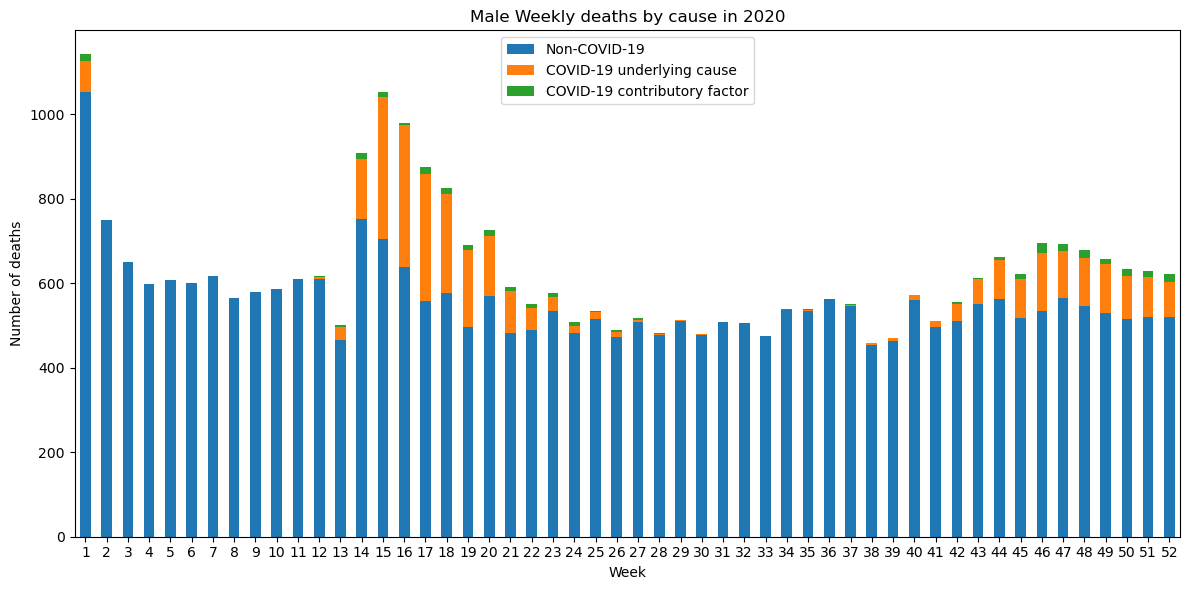

In [81]:
#All the three variables are now combined into a dataframe and named the respective columns

df_male2020 = pd.concat([non_covid_male_2020, underlying_male_2020, contributing_male_2020], axis=1)
df_male2020.columns = ['Non-COVID-19', 'COVID-19 underlying cause', 'COVID-19 contributory factor']

#Stack bar chart is plotted. The figure size is set by 12 by 6 inches, kind is set to bar to plot the bar chart and stacked is
#set to true to plot a stack bar chart in particular and it is stored in a variable called ax.

fig, ax = plt.subplots(figsize=(12,6))
df_male2020.plot(kind='bar', stacked=True, ax=ax)

#Lables were added

plt.xlabel('Week')
plt.ylabel('Number of deaths')
plt.title('Male Weekly deaths by cause in 2020')

#xticklabels is used for the markers denoting the data points on the axes. Rotation is the angle at which the ticklabels are visible.

ax.set_xticklabels(df_male2020.index, rotation=0)

#tight_layout is used for the adjustment of the space between the layout.

plt.tight_layout()

#Legend describe all the element of the graph. 

ax.legend(loc='upper center')

# Display the stack bar chart
plt.show()

# Calculation of death by cause (male) 2021

In [82]:
#There are three cause, non-Covid-19, Covid-19 underlying and Covid-19 contributory factor. For each casue number of death 
#calculation have been done week wise in the year 2020.

#The newdf2020_2022 was first filtered by year 2021 and gender (male) and then selected the particular cause, here non-Covid-19

non_covid_male_2021 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2021)&(newdf2020_2022['Cause']=='Non-COVID-19')&(newdf2020_2022['Sex']=='M')]

#Then it is grouped by week and sum the number of deaths

non_covid_male_2021 = non_covid_male_2021.groupby('Week')['Number of Deaths'].sum()
non_covid_male_2021;

#The newdf2020_2022 was first filtered by year 2021 and then selected the particular cause, here Covid-19 underlying cause

underlying_male_2021 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2021)&(newdf2020_2022['Cause']=='COVID-19 underlying cause')&(newdf2020_2022['Sex']=='M')]

#Then it is grouped by week and sum the number of deaths

underlying_male_2021 = underlying_male_2021.groupby('Week')['Number of Deaths'].sum()
underlying_male_2021;

#The newdf2020_2022 was first filtered by year 2021 and then selected the particular cause, here Covid-19 contributory factor

contributing_male_2021 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2021)&(newdf2020_2022['Cause']=='COVID-19 contributory factor')&(newdf2020_2022['Sex']=='M')]

#Then it is grouped by week and sum the number of deaths

contributing_male_2021 = contributing_male_2021.groupby('Week')['Number of Deaths'].sum()
contributing_male_2021;

# Visualisation of death by cause (male) 2021

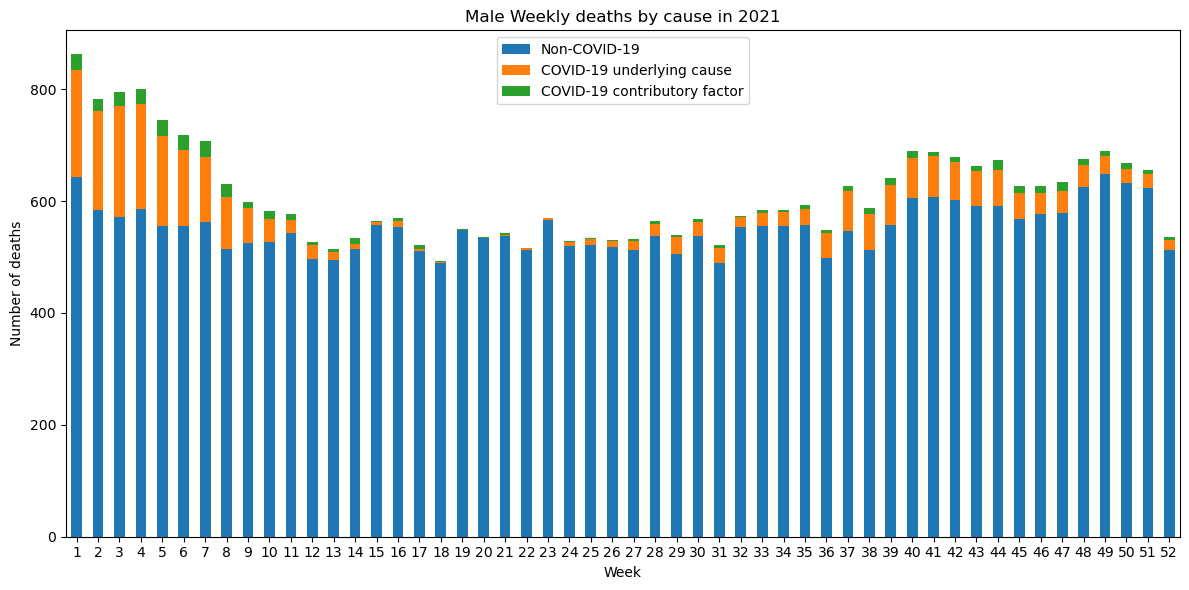

In [83]:
#All the three variables are now combined into a dataframe and named the respective columns

df_male2021 = pd.concat([non_covid_male_2021, underlying_male_2021, contributing_male_2021], axis=1)
df_male2021.columns = ['Non-COVID-19', 'COVID-19 underlying cause', 'COVID-19 contributory factor']

#Stack bar chart is plotted. The figure size is set by 12 by 6 inches, kind is set to bar to plot the bar chart and stacked is
#set to true to plot a stack bar chart in particular and it is stored in a variable called ax.

fig, ax = plt.subplots(figsize=(12,6))
df_male2021.plot(kind='bar', stacked=True, ax=ax)

#Lables were added

plt.xlabel('Week')
plt.ylabel('Number of deaths')
plt.title('Male Weekly deaths by cause in 2021')

#xticklabels is used for the markers denoting the data points on the axes. Rotation is the angle at which the ticklabels are visible.

ax.set_xticklabels(df_male2021.index, rotation=0)

#tight_layout is used for the adjustment of the space between the layout.

plt.tight_layout()

#Legend describe all the element of the graph. 

ax.legend(loc='upper center')

# Display the stack bar chart
plt.show()

# calculation of death by cause (male) 2022

In [84]:
#There are three cause, non-Covid-19, Covid-19 underlying and Covid-19 contributory factor. For each casue number of death 
#calculation have been done week wise in the year 2022.

#The newdf2020_2022 was first filtered by year 2022 and gender (male) and then selected the particular cause, here non-Covid-19

non_covid_male_2022 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2022)&(newdf2020_2022['Cause']=='Non-COVID-19')&(newdf2020_2022['Sex']=='M')]

#Then it is grouped by week and sum the number of deaths

non_covid_male_2022 = non_covid_male_2022.groupby('Week')['Number of Deaths'].sum()
non_covid_male_2022;

#The newdf2020_2022 was first filtered by year 2022 and then selected the particular cause, here Covid-19 underlying cause

underlying_male_2022 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2022)&(newdf2020_2022['Cause']=='COVID-19 underlying cause')&(newdf2020_2022['Sex']=='M')]

#Then it is grouped by week and sum the number of deaths

underlying_male_2022 = underlying_male_2022.groupby('Week')['Number of Deaths'].sum()
underlying_male_2022;

#The newdf2020_2022 was first filtered by year 2022 and then selected the particular cause, here Covid-19 contributory factor

contributing_male_2022 = newdf2020_2022.loc[(newdf2020_2022['Year']== 2022)&(newdf2020_2022['Cause']=='COVID-19 contributory factor')&(newdf2020_2022['Sex']=='M')]

#Then it is grouped by week and sum the number of deaths

contributing_male_2022 = contributing_male_2022.groupby('Week')['Number of Deaths'].sum()
contributing_male_2022;

# Visualisation of death by cause (male) 2022

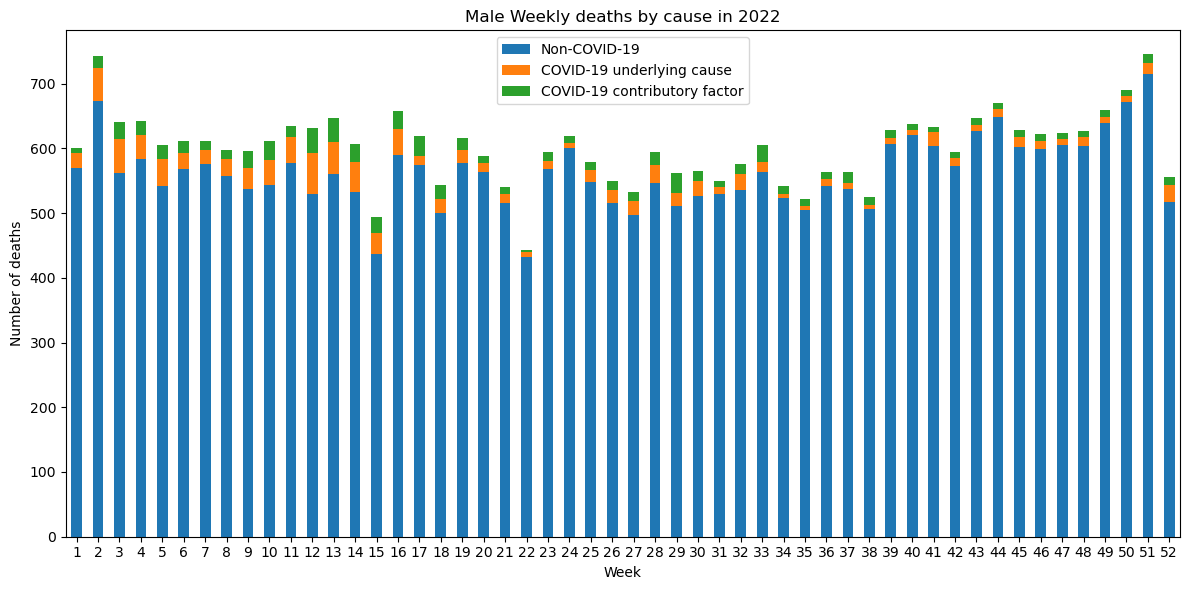

In [85]:
#All the three variables are now combined into a dataframe and named the respective columns

df_male2022 = pd.concat([non_covid_male_2022, underlying_male_2022, contributing_male_2022], axis=1)
df_male2022.columns = ['Non-COVID-19', 'COVID-19 underlying cause', 'COVID-19 contributory factor']

#Stack bar chart is plotted. The figure size is set by 12 by 6 inches, kind is set to bar to plot the bar chart and stacked is
#set to true to plot a stack bar chart in particular and it is stored in a variable called ax.

fig, ax = plt.subplots(figsize=(12,6))
df_male2022.plot(kind='bar', stacked=True, ax=ax)

#Lables were added

plt.xlabel('Week')
plt.ylabel('Number of deaths')
plt.title('Male Weekly deaths by cause in 2022')

#xticklabels is used for the markers denoting the data points on the axes. Rotation is the angle at which the ticklabels are visible.

ax.set_xticklabels(df_male2022.index, rotation=0)

#tight_layout is used for the adjustment of the space between the layout.

plt.tight_layout()

#Legend describe all the element of the graph. 

ax.legend(loc='upper center')

# Display the stack bar chart
plt.show()

# Calculation of total number of deaths by gender and cause in 2020

In [86]:
#Filter the data for the year 2020 and for cause non-COVID-19 

df_filtered2020 = newdf2020_2022[(newdf2020_2022['Year'] == 2020) & (newdf2020_2022['Cause'] == 'Non-COVID-19')]

#Calculated the sum number of deaths for females and males separately

sum_female_deaths2020 = df_filtered2020[df_filtered2020['Sex'] == 'F']['Number of Deaths'].sum()
sum_male_deaths2020 = df_filtered2020[df_filtered2020['Sex'] == 'M']['Number of Deaths'].sum()

#Printed the result

print('total female deaths due to non-COVID-19 causes in 2020:', sum_female_deaths2020)
print('total male deaths due to non-COVID-19 causes in 2020:', sum_male_deaths2020)


total female deaths due to non-COVID-19 causes in 2020: 29075
total male deaths due to non-COVID-19 causes in 2020: 29046


In [87]:
#Filter the data for the year 2020 and for cause Covid-19 underlying cause 

df_filtered2020 = newdf2020_2022[(newdf2020_2022['Year'] == 2020) & (newdf2020_2022['Cause'] == 'COVID-19 underlying cause')]

#Calculated the sum number of deaths for females and males separately

sum_female_deaths2020 = df_filtered2020[df_filtered2020['Sex'] == 'F']['Number of Deaths'].sum()
sum_male_deaths2020 = df_filtered2020[df_filtered2020['Sex'] == 'M']['Number of Deaths'].sum()

#Printed the results

print('total female deaths due to COVID-19 underlying cause in 2020:', sum_female_deaths2020)
print('total male deaths due to COVID-19 underlying cause in 2020:', sum_male_deaths2020)


total female deaths due to COVID-19 underlying cause in 2020: 2946
total male deaths due to COVID-19 underlying cause in 2020: 3102


In [88]:
#Filter the data for the year 2020 and for cause Covid-19 contributory factor

df_filtered2020 = newdf2020_2022[(newdf2020_2022['Year'] == 2020) & (newdf2020_2022['Cause'] == 'COVID-19 contributory factor')]

# Calculated the sum number of deaths for females and males separately

sum_female_deaths2020 = df_filtered2020[df_filtered2020['Sex'] == 'F']['Number of Deaths'].sum()
sum_male_deaths2020 = df_filtered2020[df_filtered2020['Sex'] == 'M']['Number of Deaths'].sum()

#Printed the results

print('total female deaths due to COVID-19 contributory factor in 2020:', sum_female_deaths2020)
print('total male deaths due to COVID-19 contributory factor in 2020:', sum_male_deaths2020)


total female deaths due to COVID-19 contributory factor in 2020: 338
total male deaths due to COVID-19 contributory factor in 2020: 316


# Calculation of total number of deaths by gender and cause in 2021

In [89]:
#Filter the data for the year 2021 and for cause non-COVID-19 

df_filtered2021 = newdf2020_2022[(newdf2020_2022['Year'] == 2021) & (newdf2020_2022['Cause'] == 'Non-COVID-19')]

#Calculated the sum number of deaths for females and males separately

sum_female_deaths2021 = df_filtered2021[df_filtered2021['Sex'] == 'F']['Number of Deaths'].sum()
sum_male_deaths2021 = df_filtered2021[df_filtered2021['Sex'] == 'M']['Number of Deaths'].sum()

#Printed the results

print('total female deaths due to non-COVID-19 causes in 2021:', sum_female_deaths2021)
print('total male deaths due to non-COVID-19 causes in 2021:', sum_male_deaths2021)


total female deaths due to non-COVID-19 causes in 2021: 29046
total male deaths due to non-COVID-19 causes in 2021: 28722


In [90]:
#Filter the data for the year 2021 and for cause Covid-19 underlying cause 

df_filtered2021 = newdf2020_2022[(newdf2020_2022['Year'] == 2021) & (newdf2020_2022['Cause'] == 'COVID-19 underlying cause')]

#Calculated the sum number of deaths for females and males separately

sum_female_deaths2021 = df_filtered2021[df_filtered2021['Sex'] == 'F']['Number of Deaths'].sum()
sum_male_deaths2021 = df_filtered2021[df_filtered2021['Sex'] == 'M']['Number of Deaths'].sum()

#Printed the results

print('total female deaths due to COVID-19 underlying cause in 2021:', sum_female_deaths2021)
print('total male deaths due to COVID-19 underlying cause in 2021:', sum_male_deaths2021)


total female deaths due to COVID-19 underlying cause in 2021: 2267
total male deaths due to COVID-19 underlying cause in 2021: 2565


In [91]:
#Filter the data for the year 2021 and for cause Covid-19 contributory factor

df_filtered2021 = newdf2020_2022[(newdf2020_2022['Year'] == 2021) & (newdf2020_2022['Cause'] == 'COVID-19 contributory factor')]

#Calculated the sum number of deaths for females and males separately

sum_female_deaths2021 = df_filtered2021[df_filtered2021['Sex'] == 'F']['Number of Deaths'].sum()
sum_male_deaths2021 = df_filtered2021[df_filtered2021['Sex'] == 'M']['Number of Deaths'].sum()

#Printed the results

print('total female deaths due to COVID-19 contributory factor in 2021:', sum_female_deaths2021)
print('total male deaths due to COVID-19 contributory factor in 2021:', sum_male_deaths2021)


total female deaths due to COVID-19 contributory factor in 2021: 476
total male deaths due to COVID-19 contributory factor in 2021: 510


# Calculation of total number of deaths by gender and cause in 2022

In [92]:
#Filter the data for the year 2022 and for cause non-COVID-19 

df_filtered2022 = newdf2020_2022[(newdf2020_2022['Year'] == 2022) & (newdf2020_2022['Cause'] == 'Non-COVID-19')]

#Calculated the sum number of deaths for females and males separately

sum_female_deaths2022 = df_filtered2022[df_filtered2022['Sex'] == 'F']['Number of Deaths'].sum()
sum_male_deaths2022 = df_filtered2022[df_filtered2022['Sex'] == 'M']['Number of Deaths'].sum()

#Printed the results

print('total female deaths due to non-COVID-19 causes in 2021:', sum_female_deaths2022)
print('total male deaths due to non-COVID-19 causes in 2021:', sum_male_deaths2022)


total female deaths due to non-COVID-19 causes in 2021: 29782
total male deaths due to non-COVID-19 causes in 2021: 29282


In [93]:
#Filter the data for the year 2022 and for cause Covid-19 underlying cause 

df_filtered2022 = newdf2020_2022[(newdf2020_2022['Year'] == 2022) & (newdf2020_2022['Cause'] == 'COVID-19 underlying cause')]

#Calculated the sum number of deaths for females and males separately

sum_female_deaths2022 = df_filtered2022[df_filtered2022['Sex'] == 'F']['Number of Deaths'].sum()
sum_male_deaths2022 = df_filtered2022[df_filtered2022['Sex'] == 'M']['Number of Deaths'].sum()

#Printed the results

print('total female deaths due to COVID-19 underlying cause in 2021:', sum_female_deaths2022)
print('total male deaths due to COVID-19 underlying cause in 2021:', sum_male_deaths2022)


total female deaths due to COVID-19 underlying cause in 2021: 1093
total male deaths due to COVID-19 underlying cause in 2021: 1142


In [94]:
#Filter the data for the year 2022 and for cause Covid-19 contributory factor

df_filtered2022 = newdf2020_2022[(newdf2020_2022['Year'] == 2022) & (newdf2020_2022['Cause'] == 'COVID-19 contributory factor')]

#Calculated the sum number of deaths for females and males separately

sum_female_deaths2022 = df_filtered2022[df_filtered2022['Sex'] == 'F']['Number of Deaths'].sum()
sum_male_deaths2022 = df_filtered2022[df_filtered2022['Sex'] == 'M']['Number of Deaths'].sum()

#Printed the results

print('total female deaths due to COVID-19 contributory factor in 2021:', sum_female_deaths2022)
print('total male deaths due to COVID-19 contributory factor in 2021:', sum_male_deaths2022)


total female deaths due to COVID-19 contributory factor in 2021: 777
total male deaths due to COVID-19 contributory factor in 2021: 858
